#Rendered Handpose Dataset
https://lmb.informatik.uni-freiburg.de/data/RenderedHandpose/RHD_v1-1.zip


Get dataset

In [1]:
%cd /content/

/content


In [2]:
!wget https://lmb.informatik.uni-freiburg.de/data/RenderedHandpose/RHD_v1-1.zip

--2024-04-14 13:31:34--  https://lmb.informatik.uni-freiburg.de/data/RenderedHandpose/RHD_v1-1.zip
Resolving lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)... 132.230.167.23
Connecting to lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)|132.230.167.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7080690299 (6.6G) [application/zip]
Saving to: ‘RHD_v1-1.zip’

RHD_v1-1.zip        100%[===================>]   6.59G  18.2MB/s    in 6m 43s  

2024-04-14 13:38:18 (16.8 MB/s) - ‘RHD_v1-1.zip’ saved [7080690299/7080690299]



Unzip datasets

In [ ]:
!unzip RHD_v1-1.zip

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/RHD_published_v2/evaluation/color/"
#depth_path = "/content/RHD_published_v2/evaluation/color/"
#mask_path = "/content/RHD_published_v2/evaluation/color/"
img_list = os.listdir(img_path)
img_list.sort()

df = pd.read_pickle('/content/RHD_published_v2/evaluation/anno_evaluation.pickle')

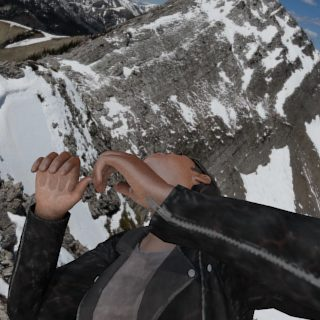

In [5]:

image_num = 150 # @param {type: "slider", min: 100, max: 200}
VISIBLE_KP = True

img = Image.open(img_path + img_list[image_num])
#img_depth = Image.open(depth_path + img_list[image_num])
#img_mask = Image.open(mask_path + img_list[image_num])

img

In [6]:
def render_kp_2d(img,lines,ax, VISIBLE_KP):
  ax.imshow(img)
  line = 0
  zero_point = 0
  i = 1

  while i < len(kp_coord_uv):
    if i == 21:
      i = 22
      zero_point = 21
    if (kp_visible[i] and kp_visible[i+1]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i][0],
                kp_coord_uv[i+1][0]],
               [kp_coord_uv[i][1],
                 kp_coord_uv[i+1][1]],
               lines[line])
    if (kp_visible[i+1] and kp_visible[i+2]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i+1][0],
                kp_coord_uv[i+2][0]],
               [kp_coord_uv[i+1][1],
                 kp_coord_uv[i+2][1]],
               lines[line])
    if (kp_visible[i+2] and kp_visible[i+3]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i+2][0],
                kp_coord_uv[i+3][0]],
               [kp_coord_uv[i+2][1],
                 kp_coord_uv[i+3][1]],
               lines[line])
    if (kp_visible[i+3] and kp_visible[zero_point]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i+3][0],
                kp_coord_uv[zero_point][0]],
               [kp_coord_uv[i+3][1],
                 kp_coord_uv[zero_point][1]],
               lines[line])
    line+=1
    if line == 5:
      line = 0
    i += 4

In [7]:
def render_kp_3d(img, lines, ax, VISIBLE_KP):
  kp_visible = (df[image_num]['uv_vis'][:, 2] == 1)

  line = 0
  zero_point = 0
  i = 1

  while i < len(kp_coord_xyz):
    if i == 21:
      i = 22
      zero_point = 21
    if (kp_visible[i] and kp_visible[i+1]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i][0],
                kp_coord_xyz[i+1][0]],
               [kp_coord_xyz[i][1],
                 kp_coord_xyz[i+1][1]],
               lines[line])
    if (kp_visible[i+1] and kp_visible[i+2]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i+1][0],
                kp_coord_xyz[i+2][0]],
               [kp_coord_xyz[i+1][1],
                 kp_coord_xyz[i+2][1]],
               lines[line])
    if (kp_visible[i+2] and kp_visible[i+3]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i+2][0],
                kp_coord_xyz[i+3][0]],
               [kp_coord_xyz[i+2][1],
                 kp_coord_xyz[i+3][1]],
               lines[line])
    if (kp_visible[i+3] and kp_visible[zero_point]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i+3][0],
                kp_coord_xyz[zero_point][0]],
               [kp_coord_xyz[i+3][1],
                 kp_coord_xyz[zero_point][1]],
               lines[line])
    line+=1
    if line == 5:
      line = 0
    i += 4
  ax.view_init(azim=-120.0, elev=-120.0, )

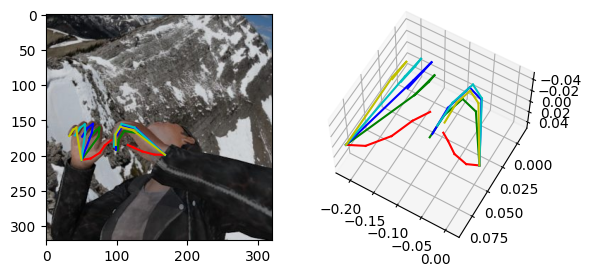

In [8]:
lines = ['r-','g-','b-','c-','y-']

kp_coord_uv = df[image_num]['uv_vis'][:, :2]

kp_coord_xyz = df[image_num]['xyz']

if VISIBLE_KP:
  kp_visible = (df[image_num]['uv_vis'][:, 2] == 1)

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
render_kp_2d(img, lines, ax,VISIBLE_KP)

ax = fig.add_subplot(1, 2, 2, projection='3d')
render_kp_3d(img, lines, ax,VISIBLE_KP)

plt.show()

#MMPose

## Install

In [ ]:
!pip3 install openmim

In [ ]:
!mim install "mmengine>=0.4.0,<1.0.0"
!mim install "mmcv>=2.0.1"

In [ ]:
!mim install "mmdet>=3.0.0,<3.3.0"

In [ ]:
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
!pip install -e .

In [5]:
import mmpose
print(mmpose.__version__)
import mmdet
print(mmdet.__version__)

1.3.1
3.2.0


## Image


In [ ]:
%env img_file=/content/RHD_published_v2/evaluation/color/00003.png

## CSPNeXt

### topdown_demo_with_mmdet


In [6]:
%env mmdet_config=demo/mmdetection_cfg/rtmdet_nano_320-8xb32_coco-person.py
%env mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth

%env mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/cspnext-m_udp_8xb64-210e_coco-wholebody-256x192.py
%env mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth

env: mmdet_config=demo/mmdetection_cfg/rtmdet_nano_320-8xb32_coco-person.py
env: mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
env: mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/cspnext-m_udp_8xb64-210e_coco-wholebody-256x192.py
env: mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [7]:
!python demo/topdown_demo_with_mmdet.py \
    ${mmdet_config} \
    ${mmdet_model} \
    ${mmpose_config} \
    ${mmpose_model} \
    --input ${img_file} \
    --output-root vis_results/CSPNeXt --draw-heatmap --device cpu --save-predictions

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth" to /root/.cache/torch/hub/checkpoints/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
100% 4.03M/4.03M [00:00<00:00, 9.49MB/s]
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth" to /root/.cache/torch/hub/checkpoints/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
100% 67.2M/67.2M [00:07<00:00, 9.39MB/s]
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcomin

### image_demo.py

In [8]:
%env mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/cspnext-m_udp_8xb64-210e_coco-wholebody-256x192.py
%env mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth

env: mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/cspnext-m_udp_8xb64-210e_coco-wholebody-256x192.py
env: mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [9]:
!python demo/image_demo.py \
    ${img_file} \
    ${mmpose_config} \
    ${mmpose_model} \
    --out-file vis_results/CSPNeXt/00003_demo.jpg \
    --draw-heatmap --device cpu

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
04/14 14:08:57 - mmengine - INFO - the output image has been saved at vis_results/CSPNeXt/00003_demo.jpg


## Hrnet_W48

### topdown_demo_with_mmdet


In [10]:
%env mmdet_config=demo/mmdetection_cfg/rtmdet_nano_320-8xb32_coco-person.py
%env mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth

%env mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/td-hm_hrnet-w48_8xb32-210e_coco-wholebody-256x192.py
%env mmpose_model=https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth

env: mmdet_config=demo/mmdetection_cfg/rtmdet_nano_320-8xb32_coco-person.py
env: mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
env: mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/td-hm_hrnet-w48_8xb32-210e_coco-wholebody-256x192.py
env: mmpose_model=https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [11]:
!python demo/topdown_demo_with_mmdet.py \
    ${mmdet_config} \
    ${mmdet_model} \
    ${mmpose_config} \
    ${mmpose_model} \
    --input ${img_file} \
    --output-root vis_results/Hrnet_W48 --draw-heatmap --device cpu --save-predictions

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth
Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth
100% 243M/243M [00:18<00:00, 13.8MB/s]
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/json_tricks/encoders.py:419: UserWarning: json-tricks: numpy scalar serialization is

### image_demo.py

In [12]:
%env mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/td-hm_hrnet-w48_8xb32-210e_coco-wholebody-256x192.py
%env mmpose_model=https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth

env: mmpose_config=configs/wholebody_2d_keypoint/topdown_heatmap/coco-wholebody/td-hm_hrnet-w48_8xb32-210e_coco-wholebody-256x192.py
env: mmpose_model=https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [13]:
!python demo/image_demo.py \
    ${img_file} \
    ${mmpose_config} \
    ${mmpose_model} \
    --out-file vis_results/Hrnet_W48/00003_demo.jpg \
    --draw-heatmap --device cpu

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_wholebody_256x192-643e18cb_20200922.pth
04/14 14:09:43 - mmengine - INFO - the output image has been saved at vis_results/Hrnet_W48/00003_demo.jpg


## RTMPose-m

### topdown_demo_with_mmdet


In [14]:
%env mmdet_config=projects/rtmpose/rtmdet/person/rtmdet_nano_320-8xb32_coco-person.py
%env mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth

%env mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
%env mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth

env: mmdet_config=projects/rtmpose/rtmdet/person/rtmdet_nano_320-8xb32_coco-person.py
env: mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
env: mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
env: mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [15]:
!python demo/topdown_demo_with_mmdet.py \
    ${mmdet_config} \
    ${mmdet_model} \
    ${mmpose_config} \
    ${mmpose_model} \
    --input ${img_file} \
    --output-root vis_results/RTMPose-m --draw-heatmap --device cpu --save-predictions

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth" to /root/.cache/torch/hub/checkpoints/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth
100% 68.7M/68.7M [00:07<00:00, 9.77MB/s]
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/mmpose/mmpose/models/heads/coo

### image_demo.py

In [16]:
%env mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
%env mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth

env: mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
env: mmpose_model=https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [17]:
!python demo/image_demo.py \
    ${img_file} \
    ${mmpose_config} \
    ${mmpose_model} \
    --out-file vis_results/RTMPose-m/00003_demo.jpg \
    --draw-heatmap --device cpu

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-coco-wholebody_pt-aic-coco_270e-256x192-cd5e845c_20230123.pth
/content/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '
04/14 14:10:17 - mmengine - INFO - the output image has been saved at vis_results/RTMPose-m/00003_demo.jpg


## DWPose-m

DWPose-m model: https://drive.google.com/file/d/13ZWnGDteGBmjALtErYS8AHhMBBNAN9en/view

### topdown_demo_with_mmdet


In [22]:
%env mmdet_config=demo/mmdetection_cfg/rtmdet_nano_320-8xb32_coco-person.py
%env mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth

%env mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
%env mmpose_model=/content/drive/MyDrive/Pose_Estimation/dw-mm_ucoco.pth

env: mmdet_config=demo/mmdetection_cfg/rtmdet_nano_320-8xb32_coco-person.py
env: mmdet_model=https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
env: mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
env: mmpose_model=/content/drive/MyDrive/Pose_Estimation/dw-mm_ucoco.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [23]:
!python demo/topdown_demo_with_mmdet.py \
    ${mmdet_config} \
    ${mmdet_model} \
    ${mmpose_config} \
    ${mmpose_model} \
    --input ${img_file} \
    --output-root vis_results/RTMPose-m --draw-heatmap --device cpu --save-predictions

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_nano_8xb32-100e_coco-obj365-person-05d8511e.pth
Loads checkpoint by local backend from path: /content/drive/MyDrive/Pose_Estimation/dw-mm_ucoco.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '
/usr/local/lib/python3.10/dist-packages/json_tricks/encoders.py:419: UserWarning: json-tricks: numpy scalar serialization is experimental and may

### image_demo.py

In [24]:
%env mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
%env mmpose_model=/content/drive/MyDrive/Pose_Estimation/dw-mm_ucoco.pth

env: mmpose_config=projects/rtmpose/rtmpose/wholebody_2d_keypoint/rtmpose-m_8xb64-270e_coco-wholebody-256x192.py
env: mmpose_model=/content/drive/MyDrive/Pose_Estimation/dw-mm_ucoco.pth
env: img_file=/content/RHD_published_v2/evaluation/color/00003.png


In [25]:
!python demo/image_demo.py \
    ${img_file} \
    ${mmpose_config} \
    ${mmpose_model} \
    --out-file vis_results/RTMPose-m/00003_demo.jpg \
    --draw-heatmap --device cpu

Loads checkpoint by local backend from path: /content/drive/MyDrive/Pose_Estimation/dw-mm_ucoco.pth
/content/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '
04/14 14:15:46 - mmengine - INFO - the output image has been saved at vis_results/RTMPose-m/00003_demo.jpg
